Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

Ananya Gandhi, no collaborators

# HW 8:  Linear Algebra Part 2

## Question 1

We know that interpolation using equispaced points is not ideal but we can also show that it is ill-conditioned.  To illustrate this let $x_1, \ldots, x_n$ and $y_1, \ldots, y_m$ by $n$ and $m$ equispaced points from $-1$ to $1$ repectively.

**(a)** [10] Derive a formula for the $m \times n$ matrix $A$ that maps an $n$-vector of data at $\{x_j\}$ to an $m$-vector of sampled values $\{\mathcal{P}(y_j)\}$, where $\mathcal{P}$ is the degree $n-1$ polynomial interpolant of the data.

First, start by using Vandermonde matrices $V_x$ and $V_y$ for $x, y$ respectively. 

These matrices are:
$$
  V_x = \begin{bmatrix} 
    1 & x_1 & x_1^2 & ... & x_1^{n-1} \\
    1 & x_2 & x_2^2 & ... & x_2^{n-1} \\
    . & . & . &  & . \\
    . & . & . &  & . \\
    . & . & . &  & . \\
    1 & x_n & x_n^2 & ... & x_n^{n-1} \\
  \end{bmatrix} \\
$$
which is a $n \times n$ matrix

Then, we want to fit the data to a polynomial of order $n - 1$, so we get the following Vandermonde matrix for $y$:

$$ 
  V_y = \begin{bmatrix} 
    1 & y_1 & y_1^2 & ... & y_1^{n-1} \\
    1 & y_2 & y_2^2 & ... & y_2^{n-1} \\
    . & . & . &  & . \\
    . & . & . &  & . \\
    . & . & . &  & . \\
    1 & y_m & y_m^2 & ... & y_m^{n-1} \\
  \end{bmatrix}
$$
which is an $m \times n$ matrix. 

Then, to map the polynomial interpolants to each other, we can look at the problem:

$$
    A \mathcal{P}(x) = \mathcal{P}(y) \\
    A V_x p = V_y p \\
    (A V_x - V_y) p = 0 \\
    A V_x - V_y = 0 \\
    A V_x = V_y  \\
    A = V_y V_x^{-1}
$$

So we get that the matrix A for the mapping is:
$$ 
  A = \begin{bmatrix} 
    1 & y_1 & y_1^2 & ... & y_1^{n-1} \\
    1 & y_2 & y_2^2 & ... & y_2^{n-1} \\
    . & . & . &  & . \\
    . & . & . &  & . \\
    . & . & . &  & . \\
    1 & y_m & y_m^2 & ... & y_m^{n-1} \\
  \end{bmatrix} \begin{bmatrix} 
    1 & x_1 & x_1^2 & ... & x_1^{n-1} \\
    1 & x_2 & x_2^2 & ... & x_2^{n-1} \\
    . & . & . &  & . \\
    . & . & . &  & . \\
    . & . & . &  & . \\
    1 & x_n & x_n^2 & ... & x_n^{n-1} \\
  \end{bmatrix} ^{-1}
$$

**(b)** [5]) Write a program to calculate $A$ and plot $||A||_\infty$ on a semilog scale for $n=1, 2, \ldots, 30$, $m=2n-1$.  In the continuous limit $m \rightarrow \infty$, the numbers $||A||_\infty$ are known as the Lebesgue constants for equispaced interpolation, which are asymptotic to $2^n / (e(n-1) \log n)$ as $n \rightarrow \infty$.

<ipython-input-3-c10463deaf2e>:22: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 2**x / (numpy.e*(x - 1)*numpy.log(x))


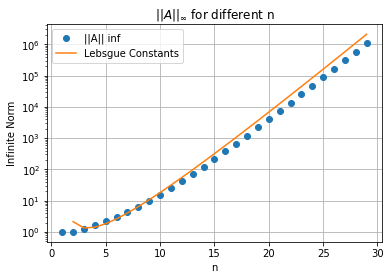

In [3]:
# YOUR CODE HERE
# raise NotImplementedError()

nums = [i for i in range(1, 30)]
Ainf_norm = []

for i in range(len(nums)):
  n = nums[i]
  m = 2*n - 1

  x = numpy.linspace(-1, 1, n)
  y = numpy.linspace(-1, 1, m)

  Vy = numpy.vander(y, N=n, increasing=True)
  Vx = numpy.vander(x, increasing=True)
  Vx_inv = numpy.linalg.inv(Vx)

  A = numpy.matmul(Vy, Vx_inv)
  Ainf_norm.append(numpy.linalg.norm(A, ord=numpy.inf))

# compare to Lebesgue
f = lambda x: 2**x / (numpy.e*(x - 1)*numpy.log(x))
fn = [f(n) for n in nums]

plt.semilogy(nums, Ainf_norm, "o", label="||A|| inf")
plt.semilogy(nums, fn, label="Lebsgue Constants")
plt.xlabel("n")
plt.ylabel("Infinite Norm")
plt.title("$||A||_{\infty}$ for different n")
plt.legend()
plt.grid()
plt.show()

**(c)** [10] Derive a general way to compute the $\infty$-norm condition number $\kappa$ of the problem of interpolating the function $f(x) = 1$.  Plot the result for $n=1,2,\ldots,30$ and $m=2n-1$.  Hint:  Use the expression we found involving the Jacobian.

We have $f(x) = \mathcal{P}(x) = 1$, so we get:
$$
    A \vec{x} = \begin{bmatrix}
      1 \\
      1 \\
      ... \\
      1
    \end{bmatrix}
$$

$$
    [J(x)]_{ij} = \frac{\partial f_i}{\partial x_j}(x) = A
$$

We can use the Jacobian to calculate:
$$
  \kappa = \frac{||J(x)||_{\infty}}{\frac{||f(x)||_{\infty}}{||x||_{\infty}}} = \frac{||J(x)||_{\infty}}{\frac{||Ax||_{\infty}}{||x||_{\infty}}} \\
  \kappa = \frac{||A||_{\infty}}{\frac{1}{1}} = ||A||_{\infty} \\
$$
This gives us that the condition number $\kappa$ of the infinite norm is:
$$ \kappa = ||A||_{\infty} $$

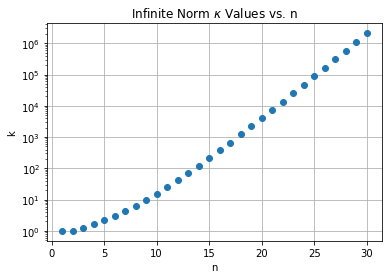

In [4]:
nums = []
k = []

for n in range(1,31):
  nums.append(n)
  m = 2*n - 1

  x = numpy.linspace(-1, 1, n)
  y = numpy.linspace(-1, 1, m)

  Vy = numpy.vander(y, N=n, increasing=True)
  Vx = numpy.vander(x, increasing=True)
  Vx_inv = numpy.linalg.inv(Vx)
  A = numpy.matmul(Vy, Vx_inv)

  k.append(numpy.linalg.norm(A, numpy.inf))

plt.semilogy(nums, k, "o")
plt.xlabel("n")
plt.ylabel("k")
plt.title("Infinite Norm $\kappa$ Values vs. n")
plt.grid()
plt.show()

## Question 2 - LU Factorization

Gaussian elimination is usually one of the first operations students learn in linear algebra but we seemed to have skipped it in lecture!  Let us fix that here in the homework.  Make sure to read the lecture on Gaussian elimination when doing this question.

**(a)** [10] By hand compute the $LU$ factorization of the matrix
$$
    A = \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}.
$$
Make sure to compute all the way to the matrix $L$, not the components of the inverse.  You do not have to worry about pivoting.

YOUR ANSWER HERE

We compute the $LU$ factorization such that at every step $i, L_i U_i = A$. 

$$
    L_0 = \begin{bmatrix} 
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 1 \\
    \end{bmatrix} 
$$

$$
    U_0 =  \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}
$$

In the first step, we eliminate the elements of the first column below the diagonal. 

$$
    L_1 = \begin{bmatrix} 
        1 & 0 & 0 \\
        -2 & 1 & 0 \\
        -4 & 0 & 1 \\
        \end{bmatrix} \\
    U_1 = \begin{bmatrix} 
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 4 & 3 \\
        \end{bmatrix} \\
$$

In the second step, we repeat by eliminating elements of the second column below the diagonal. 

$$
    L_2 = \begin{bmatrix} 
        1 & 0 & 0 \\
        -2 & 1 & 0 \\
        -4 & -1 & 1 \\
        \end{bmatrix} \\
    U_2 = \begin{bmatrix} 
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 0 & 1 \\
        \end{bmatrix} \\
$$

Finally, this allows us to rewrite A as:
$$
    A = \begin{bmatrix} 
        1 & 0 & 0 \\
        2 & 1 & 0 \\
        4 & 1 & 1 \\
        \end{bmatrix} \begin{bmatrix} 
        4 & 8 & 1 \\
        0 & 4 & 2 \\
        0 & 0 & 1 \\
        \end{bmatrix} \\
$$

**(b)** [10] Write a function that computes the $LU$ factorization of a given matrix $A \in \mathbb R^{n \times n}$ without using `numpy` or `scipy` packages.  Make sure to also return the pivoting matrix, i.e. compute the matrices $P$, $L$, and $U$ where
$$
    P A = L U.
$$
Note that the provided function `swap_rows` may be useful although you do not have to use it.  You may also want to use the example in the notes to test your basic algorithm with (i.e. `A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)` noting that the algorithm will complain without the casting to `float`).

In [5]:
def swap_rows(i, j, A, column_indices=None):
    r"""
    Swap the ith and jth rows of the matrix A in place
    
    Optional argument column_indices is a tuple that controls 
    the columns being swapped.  Defaults to the entire row.
    """
    if column_indices is None:
        column_indices = (0, A.shape[0])
    
    pivot_row = A[i, column_indices[0]:column_indices[1]].copy()
    A[i, column_indices[0]:column_indices[1]] = A[j, column_indices[0]:column_indices[1]]
    A[j, column_indices[0]:column_indices[1]] = pivot_row


def LU_factorization(A):
    # YOUR CODE HERE
    # raise NotImplementedError()

    U = A.copy()
    L = numpy.identity(A.shape[0])
    P = numpy.identity(A.shape[0])
    m = A.shape[0]

    for k in range(m):

      i = numpy.argmax(numpy.abs(U[k:, k]))
      i += k

      swap_rows(k, i, U, [k, m])
      swap_rows(k, i, L, [0, k])
      swap_rows(k, i, P)

      for j in range(k + 1, m):
        L[j, k] = U[j, k] / U[k, k]
        U[j, k:] = U[j, k:] - L[j, k] * U[k, k:]

    return P, L, U

In [6]:
import scipy.linalg
# A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)
A = numpy.random.uniform(low=1.0, high=10.0, size=(25, 25))
P, L, U = LU_factorization(A)
P_s, L_s, U_s = scipy.linalg.lu(A)
numpy.testing.assert_allclose(P, numpy.linalg.inv(P_s))
numpy.testing.assert_allclose(L, L_s)
numpy.testing.assert_allclose(U, U_s, atol=1e-8)
print("Success!")

Success!


**(c)** [10] For this question write a function that solves the system $A x = b$ given an $A$ and $b$ using your $LU$ factorization function and the pivot matrix.  Again do not use any of the functions from `numpy` or `scipy` other than to check your solution.

In [7]:
def solve(A, b):
    # YOUR CODE HERE
    # raise NotImplementedError()

    P, L, U = LU_factorization(A)

    # forward substitution for Ly = Pb

    Pb = numpy.dot(P, b)
    y = numpy.zeros(b.shape)

    for i in range(L.shape[0]):
      
      ly = 0

      for j in range(i):

        ly += L[i, j] * y[j]
      
      y[i] = Pb[i] - ly
    

    # backward substitution 
    x = numpy.zeros(b.shape)
    m = U.shape[0]

    for i in range(1, m + 1):
      
      ux = 0

      for j in range(1, i):

        ux += U[m - i, m - j] * x[m - j]
      
      y[m - i] -= ux
      x[m - i] = y[m - i] / U[m - i, m - i]
      x[m - 1] = y[m - 1] / U[m - 1, m - 1]

    return x

In [8]:
m = 10
A = numpy.random.uniform(size=(m, m))
b = numpy.random.uniform(size=(m))
x = solve(A, b)
x_n = numpy.linalg.solve(A, b)
numpy.testing.assert_allclose(x, x_n)
print("Success!")

Success!


## Question 3

Consider the system of equations $Ax = b$ defined by
$$A = \begin{bmatrix}
        0.780 & 0.563 \\
        0.913 & 0.659 
    \end{bmatrix}
    \quad \text{and} \quad 
    b = \begin{bmatrix}
        0.217 \\
        0.254 
    \end{bmatrix}.
$$
The true solution of this system is $$x^T = [1, -1]$$.  Consider for the following questions the approximate solutions
$$
    x^T_1 = [0.999, -1.001] \quad \text{and} \quad x^T_2 = [0.341, -0.087]
$$
and define the residual $r(y)$ as
$$
    r(y) = b - A y.
$$

**(a)** [10] Compute the residuals (you may use `numpy`) $||r(x_1)||$ and $||r(x_2)||$ for the two approximate solutions using a couple of different norms.  Does the more accurate solution have a smaller residual?  Does it matter which norm you use?

In [9]:
# YOUR CODE HERE
# raise NotImplementedError()

A = numpy.array([[0.780, 0.563], [0.913, 0.659]])

b = numpy.array([0.217, 0.254])

x1 = numpy.array([0.999, -1.001])
x2 = numpy.array([0.341, -0.087])

resx1 = b - numpy.dot(A, x1)
resx2 = b - numpy.dot(A, x2)

norm_11 = numpy.linalg.norm(resx1, ord=1)
norm_12 = numpy.linalg.norm(resx1, ord=2)
norm_1inf = numpy.linalg.norm(resx1, ord=numpy.inf)

print("Residual 1, Order 1:", norm_11)
print("Residual 1, Order 2:", norm_12)
print("Residual 1, Order Inf:", norm_1inf)

norm_21 = numpy.linalg.norm(resx2, ord=1)
norm_22 = numpy.linalg.norm(resx2, ord=2)
norm_2inf = numpy.linalg.norm(resx2, ord=numpy.inf)

print("\nResidual 2, Order 1:", norm_21)
print("Residual 2, Order 2:", norm_22)
print("Residual 2, Order Inf:", norm_2inf)

Residual 1, Order 1: 0.0029149999999999177
Residual 1, Order 2: 0.0020675669275744828
Residual 1, Order Inf: 0.0015720000000000178

Residual 2, Order 1: 9.99999999945489e-07
Residual 2, Order 2: 9.99999999945489e-07
Residual 2, Order Inf: 9.99999999945489e-07


We can see above that the more accurate solution is $x_1$ because it is closer to the true solution of the system. When we compute the residuals for both $x_1, x_2$ and then take the 1st, 2nd, and infinite-order norms, we get the above result. The second value $x_2$ has a smaller residual, regardless of which norm is used. This behavior is a bit weird, because the more accurate solution is clearly $x_1$ because it is visibly much closer to the true solution of the system. We can see if the vector $\vec{x}$ is only slightly perturbed, there is a big residual. 

**(b)** [10] Compute $||A||$, $||A^{-1}||$ and the condition number $\kappa(A)$ of the matrix using the $L_2$ and $L_\infty$ norms.  Again you can use `numpy`.

In [10]:
# YOUR CODE HERE
# raise NotImplementedError()
inv = numpy.linalg.inv(A)

A2_norm = numpy.linalg.norm(A,2)
inv2_norm = numpy.linalg.norm(inv, 2)
condition2 = A2_norm * inv2_norm
print("||A||2 is", A2_norm)
print("||A-1||2 is", inv2_norm)
print("K_2(A) is", condition2)

Ainf_norm = numpy.linalg.norm(A, numpy.inf)
invinf_norm = numpy.linalg.norm(inv, numpy.inf)
conditioninf = Ainf_norm * invinf_norm

print("\n||A||inf is", Ainf_norm)
print("||A-1||inf is", invinf_norm)
print("K_inf(A) is", conditioninf)

||A||2 is 1.4809520586432041
||A-1||2 is 1480952.0584615201
K_2(A) is 2193218.999730479

||A||inf is 1.572
||A-1||inf is 1692999.9997923018
K_inf(A) is 2661395.9996734983


**(c)** [15] Explain the behavior from part (a) using the results of part (b) discussing how condition numbers play a role in the problem above.  Hint:  Think about the problem where only the vector $x$ is perturbed by some small amount $\delta x$

If we consider the problem where $\vec{x}$ is perturbed by some small amount, we have:

$$
    A(\vec{x} + \delta x) = \vec{b} \\
    \delta r = r(x + \delta x) - r(x) \\
    \delta r = b - A(x + \delta x) - (b - Ax) \\
    \delta r = - A \delta x
$$

If we calculate the norm of the resulting change in the residual, we get:

$$
    \frac{||\delta r||}{||\delta x||} = \frac{||-A\delta x||}{||\delta x||} \\
$$

This result indicates that any small perturbation in the first value $x_1$ will have a large impact on the residual. Changes on the second value $x_2$ still has an impact on the residual, but not as much of an impact as a change in $x_1$. 